<a href="https://colab.research.google.com/github/Arminhosseini/Keras_mnist/blob/main/MNIST_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test,y_test) = mnist.load_data()
x_train,x_test = x_train/255.0 , x_test/255.0

3


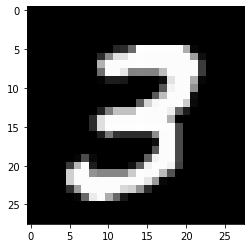

In [ ]:
plt.imshow(x_train[7], cmap='gray')
print(y_train[7])

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

print(model.summary())

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2945 - accuracy: 0.9145
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1435 - accuracy: 0.9570
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1088 - accuracy: 0.9673
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0878 - accuracy: 0.9730
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0759 - accuracy: 0.9752


In [ ]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0774 - accuracy: 0.9766


[0.07739971578121185, 0.9765999913215637]

true label: 4
predicted label: 4


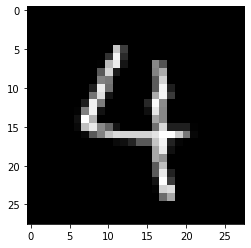

In [ ]:
print('true label: %d'%(y_test[24]))
plt.imshow(x_test[24], cmap='gray')


predictions = model.predict(np.reshape(x_test[24], [-1,28,28]))
print('predicted label: %d'%(np.argmax(predictions)))